In [1]:
# Loan_ID 	Loan reference number

# Gender 	Applicant gender - (Male or Female)

# Married 	Applicant marital status (Married or not married) 

# Dependents 	Number of family members 	0; 1; 2; 3+

# Education 	Applicant education/qualification 
# (graduate or not graduate) 	Graduate; Under Graduate

# Self_Employed 	Applicant employment status
# (yes for self-employed, no for employed/others) 	Yes; No

# ApplicantIncome 	Applicant's monthly salary/income

# CoapplicantIncome 	Additional applicant's monthly salary/income 

# LoanAmount 	Loan amount 

# Loan_Amount_Term 	The loan's repayment period (in days) 

# Credit_History 	 Records of previous credit history
# (0: bad credit history, 1: good credit history) 	0; 1

# Property_Area 	The location of property
# (Rural/Semiurban/Urban) 	Rural; Semiurban; Urban

# Loan_Status 	Status of loan
# (Y: accepted, N: not accepted)

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [90]:
df.shape

(614, 13)

In [91]:
nv = df.isna().sum()
nv = nv[nv>0]
nv

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [92]:
df.duplicated().sum()

0

In [93]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [94]:
cat_cols1 = df.select_dtypes(include='object').columns
print(cat_cols1)
num_cols1 = df.select_dtypes(exclude='object').columns
print(num_cols1)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [95]:
nv

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [96]:
cols = ['Gender','Married','Dependents','Self_Employed']
for i in cols:
    print(i,df[i].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Self_Employed ['No' 'Yes' nan]


In [97]:
df['Gender'].value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [98]:
df['Gender'].value_counts(normalize=True,dropna=False)

Male      0.796417
Female    0.182410
NaN       0.021173
Name: Gender, dtype: float64

In [99]:
489/(489+112+13)

0.7964169381107492

In [100]:
cols = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term']
for i in cols:
    print(i)
    print(df[i].value_counts())

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [101]:
# mean, median, mode

In [102]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [103]:
df.groupby(['Loan_Status','Loan_Amount_Term'])['Loan_Amount_Term'].count()

Loan_Status  Loan_Amount_Term
N            36.0                  2
             84.0                  1
             180.0                15
             240.0                 1
             300.0                 5
             360.0               153
             480.0                 9
Y            12.0                  1
             60.0                  2
             84.0                  3
             120.0                 3
             180.0                29
             240.0                 3
             300.0                 8
             360.0               359
             480.0                 6
Name: Loan_Amount_Term, dtype: int64

In [104]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [105]:
df.groupby(['Loan_Status','Dependents'])['Dependents'].count()

Loan_Status  Dependents
N            0             107
             1              36
             2              25
             3+             18
Y            0             238
             1              66
             2              76
             3+             33
Name: Dependents, dtype: int64

In [106]:
df.groupby(['Loan_Status','Self_Employed'])['Self_Employed'].count()

Loan_Status  Self_Employed
N            No               157
             Yes               26
Y            No               343
             Yes               56
Name: Self_Employed, dtype: int64

In [107]:
df.groupby(['Loan_Status','Credit_History'])['Credit_History'].count()

Loan_Status  Credit_History
N            0.0                82
             1.0                97
Y            0.0                 7
             1.0               378
Name: Credit_History, dtype: int64

In [108]:
cols = ['Credit_History','Self_Employed','Dependents']
for i in cols:
    print(df.groupby(['Loan_Status',i])[i].count())

Loan_Status  Credit_History
N            0.0                82
             1.0                97
Y            0.0                 7
             1.0               378
Name: Credit_History, dtype: int64
Loan_Status  Self_Employed
N            No               157
             Yes               26
Y            No               343
             Yes               56
Name: Self_Employed, dtype: int64
Loan_Status  Dependents
N            0             107
             1              36
             2              25
             3+             18
Y            0             238
             1              66
             2              76
             3+             33
Name: Dependents, dtype: int64


In [109]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [110]:
cols = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for i in cols:
    df[i] = df[i].fillna(df[i].mode()[0])

In [111]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [112]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

LoanAmount          22
Loan_Amount_Term    14
dtype: int64

In [113]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [114]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [115]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### EDA

In [116]:
print(cat_cols)
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


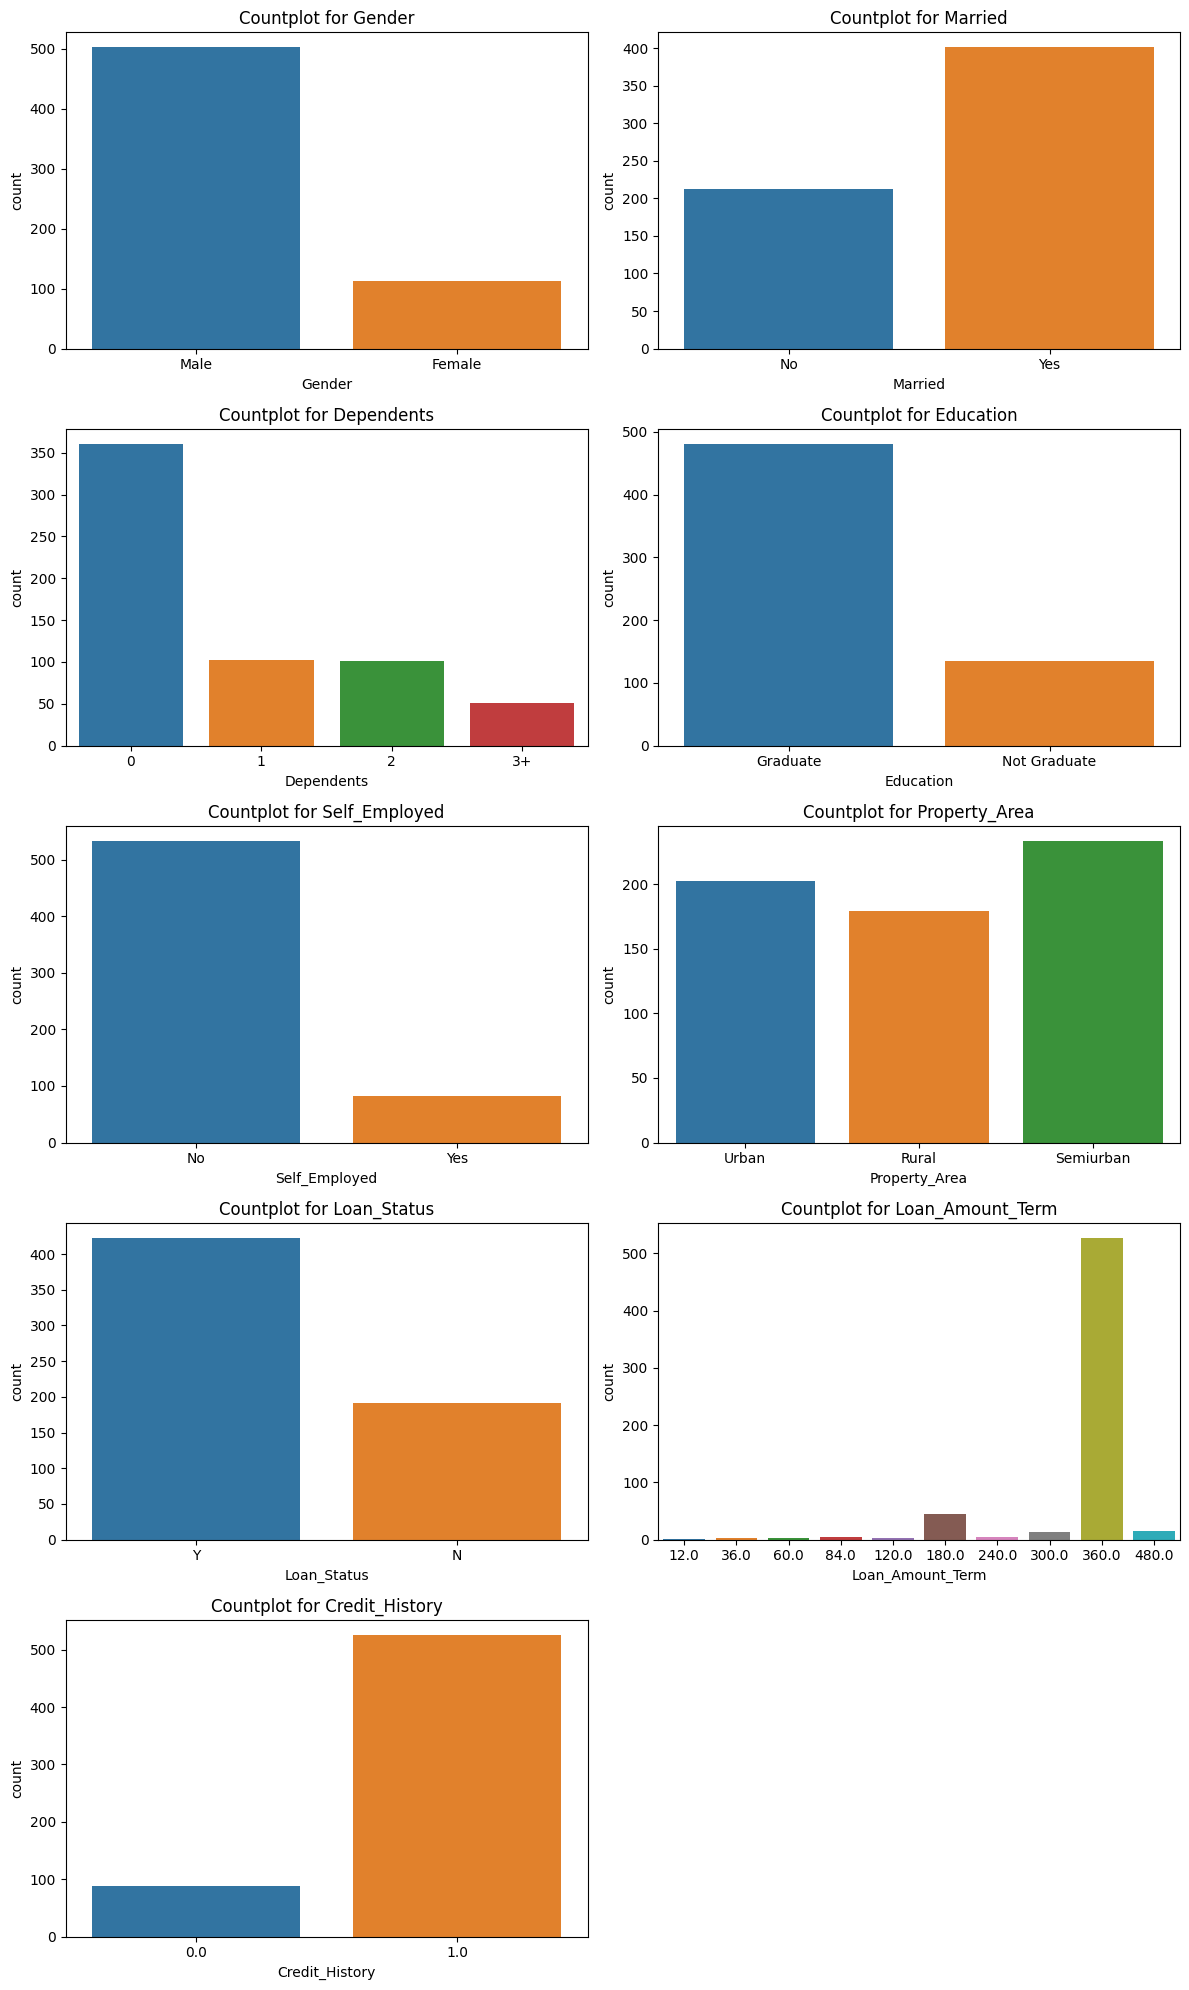

In [117]:
cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

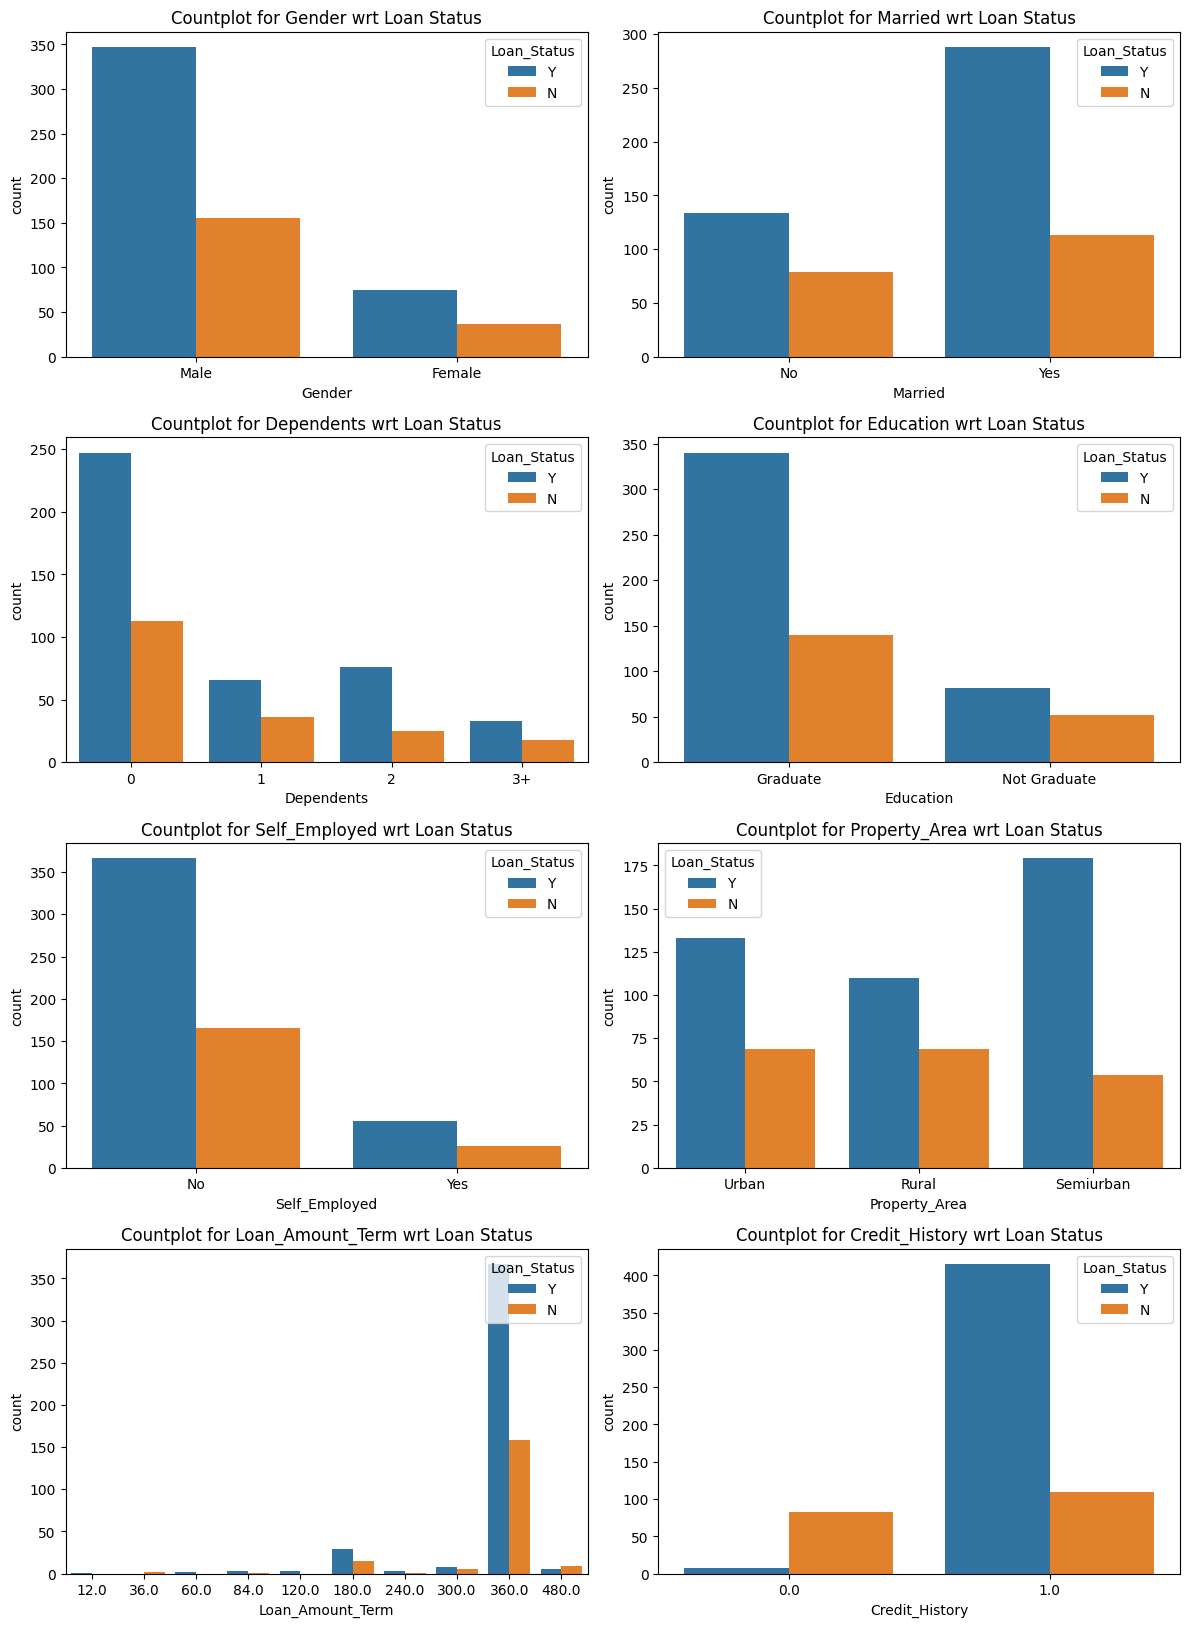

In [118]:
cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df[cols[i]],hue=df['Loan_Status'])
    plt.title(f'Countplot for {cols[i]} wrt Loan Status')

plt.tight_layout()
plt.show()

In [119]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

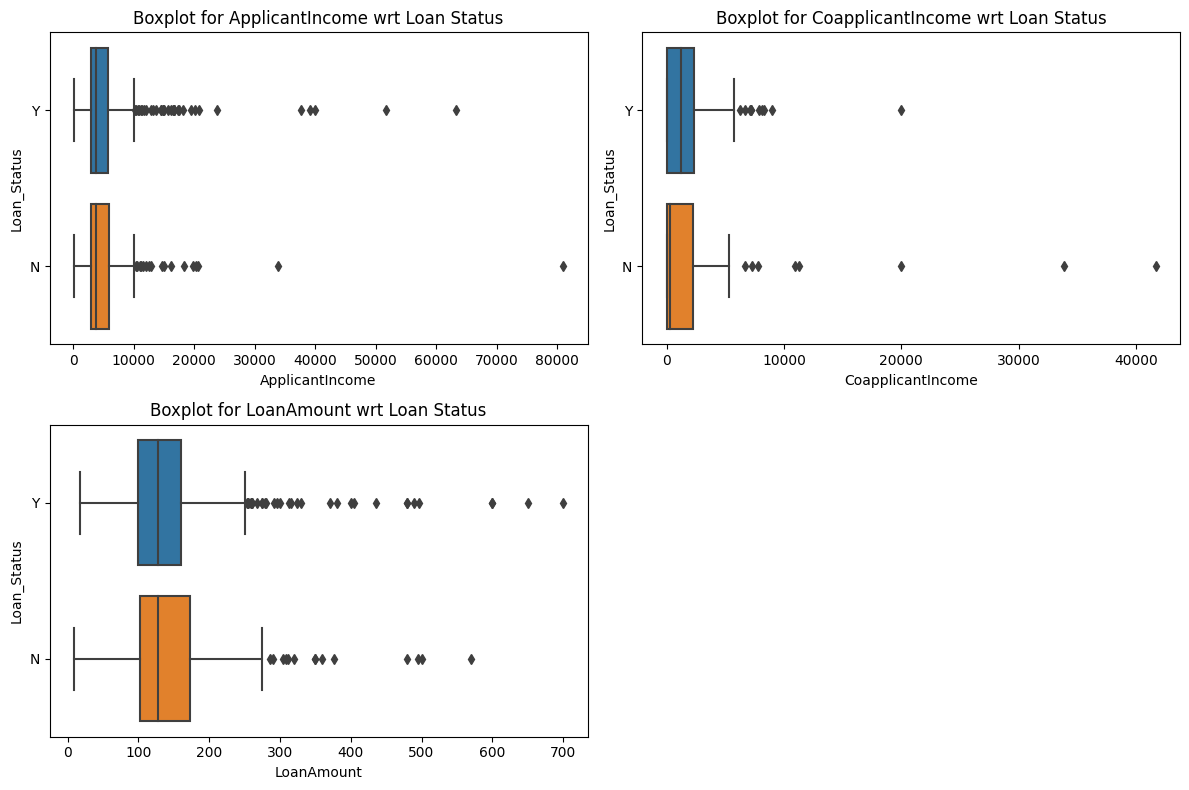

In [120]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(12,8))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]],y=df['Loan_Status'])
    plt.title(f'Boxplot for {cols[i]} wrt Loan Status')

plt.tight_layout()
plt.show()

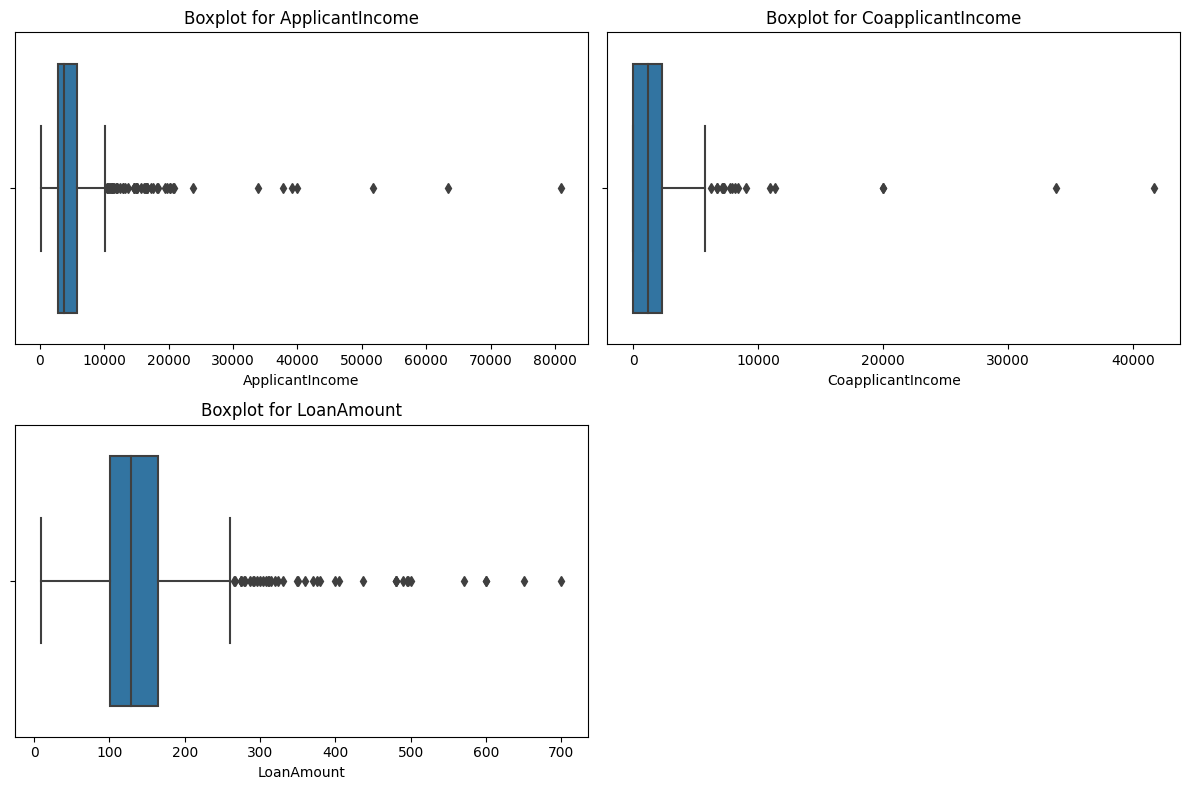

In [121]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(12,8))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [122]:
# df[col] = df[col].fillna(df[col].mode()[0])
# OR
# df[col].fillna(df[col].mode()[0],inplace=True)

#### Correlation

C:\Users\Dell\AppData\Local\Temp\ipykernel_5232\1051870675.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


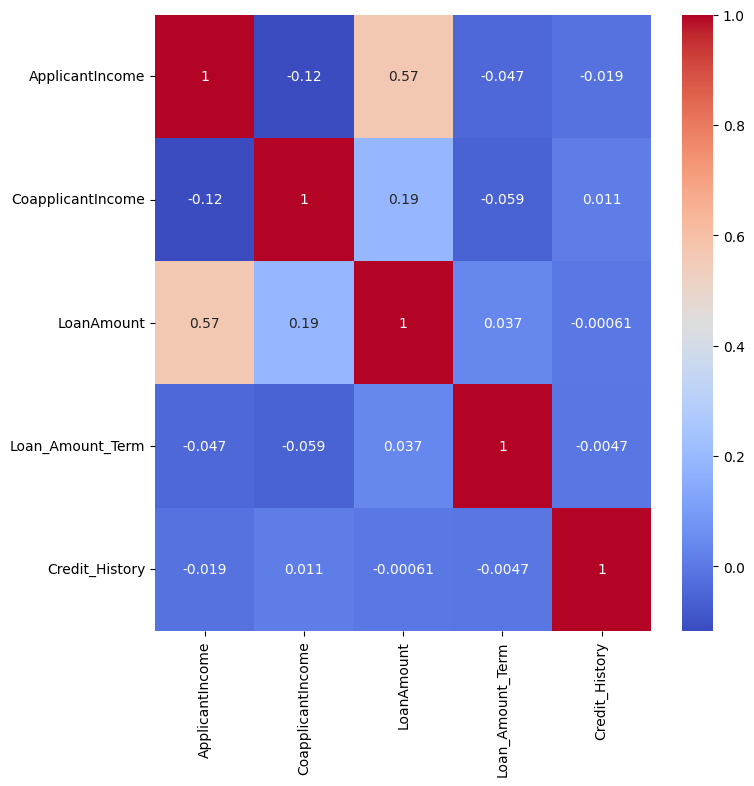

In [123]:
corr = df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#### Outlier Treatment

In [124]:
a = df.describe(percentiles=[0.01,0.02,0.05,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,98%,99%,max
ApplicantIncome,150.0,1025.00,1554.12,1897.55,3812.5,19666.04,32540.41,81000.0
CoapplicantIncome,0.0,0.00,0.00,0.00,1188.5,7198.56,8895.89,41667.0
LoanAmount,9.0,30.65,44.00,57.30,128.0,427.94,495.87,700.0
Loan_Amount_Term,12.0,84.00,180.00,180.00,360.0,480.00,480.00,480.0
Credit_History,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0


In [125]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for i in cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1         # inter quartile range
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    print(i,upper,lower)
    df[i] = np.where(df[i]>upper,upper,df[i])
    df[i] = np.where(df[i]<lower,lower,df[i])

ApplicantIncome 10171.25 -1498.75
CoapplicantIncome 5743.125 -3445.875
LoanAmount 261.5 3.5


In [126]:
df[df['ApplicantIncome']>10171.25].shape

(0, 13)

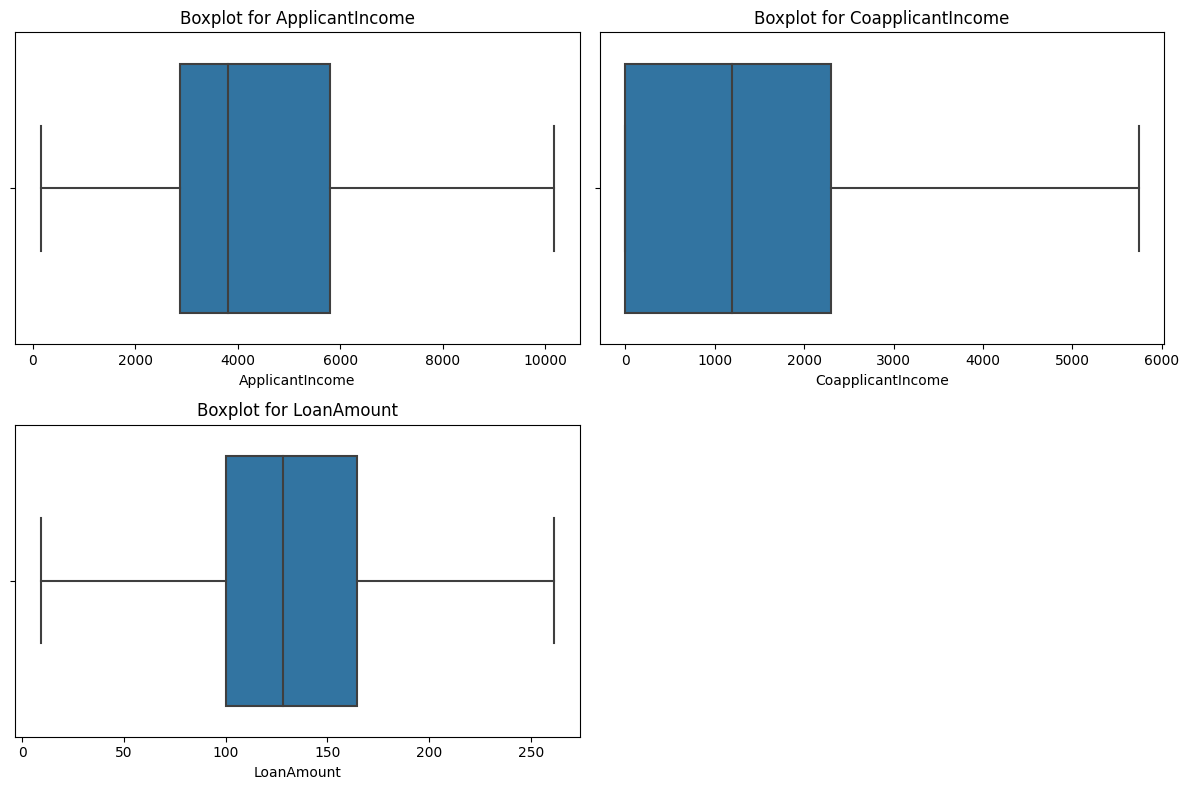

In [127]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(12,8))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [132]:
a = df.describe(percentiles=[0.01,0.02,0.05,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,98%,99%,max
ApplicantIncome,150.0,1025.00,1554.12,1897.55,3812.5,10171.250,10171.250,10171.250
CoapplicantIncome,0.0,0.00,0.00,0.00,1188.5,5743.125,5743.125,5743.125
LoanAmount,9.0,30.65,44.00,57.30,128.0,261.500,261.500,261.500
Loan_Amount_Term,12.0,84.00,180.00,180.00,360.0,480.000,480.000,480.000
Credit_History,0.0,0.00,0.00,0.00,1.0,1.000,1.000,1.000


#### Encoding categorical Features

In [128]:
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [129]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [130]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [131]:
df_dum = pd.get_dummies(data=df,columns=['Gender','Married','Dependents',
                                       'Education','Self_Employed',
                                        'Property_Area'],drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(614, 16)
Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


#### Select x and y

In [133]:
x = df_dum.drop(['Loan_ID','Loan_Status'],axis=1)
y = df_dum['Loan_Status']
print(x.shape)
print(y.shape)

(614, 14)
(614,)


In [135]:
x.dtypes.value_counts()

uint8      9
float64    5
dtype: int64

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,
                                                  random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 14)
(185, 14)
(429,)
(185,)


In [138]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score

In [143]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    cr = classification_report(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',cr)

def gen_res(model,xtrain,xtest,ytrain,ytest,ypred,model_name):
    eval_model(ytest,ypred)
    train_acc = model.score(xtrain,ytrain)  # Train Acc
    test_acc = model.score(xtest,ytest)     # Test Acc
    pre1 = precision_score(ytest,ypred,pos_label='Y')  # pre score = 1
    rec1 = recall_score(ytest,ypred,pos_label='Y')     # rec score = 1
    res = pd.DataFrame({'Train Acc':train_acc,'Test Acc':test_acc,
                       'Pre_Y':pre1,'Rec_Y':rec1},index=[model_name])
    return res

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(x_train,y_train)
ypred = lr1.predict(x_test)
lr1_res1 = gen_res(lr1,x_train,x_test,y_train,y_test,ypred,'Log_Reg1')
lr1_res1

Confusion Matrix
 [[ 27  38]
 [  2 118]]
Classification Report
               precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



,Train Acc,Test Acc,Pre_Y,Rec_Y
Log_Reg1,0.818182,0.783784,0.75641,0.983333


In [151]:
ypred_proba = lr1.predict_proba(x_test)
print(ypred_proba.shape)
print(ypred_proba[:5])

(185, 2)
[[0.17038744 0.82961256]
 [0.12566267 0.87433733]
 [0.18300353 0.81699647]
 [0.21537813 0.78462187]
 [0.15139028 0.84860972]]


In [149]:
print(x_test.shape)

(185, 14)


In [152]:
from sklearn.metrics import *

AUC Score 0.7766666666666666


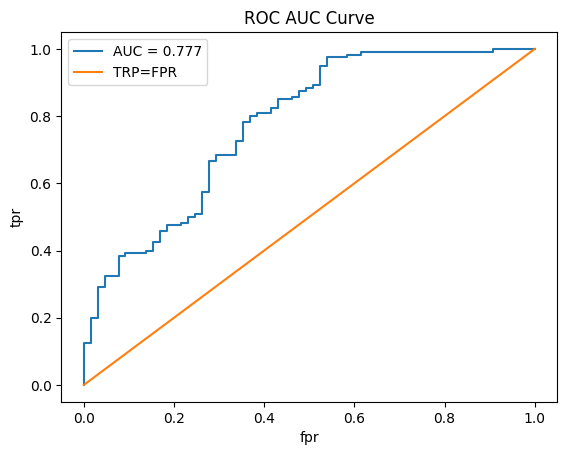

In [159]:
fpr,tpr,thresh = roc_curve(y_test,ypred_proba[:,1],pos_label='Y')
auc_score = roc_auc_score(y_test,ypred_proba[:,1])
print('AUC Score',auc_score)
plt.plot(fpr,tpr,label=f'AUC = {round(auc_score,3)}')
plt.plot([0,1],[0,1],label='TRP=FPR')
plt.legend()
plt.title('ROC AUC Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()